# Practical Homework 1


<IPython.core.display.Javascript object>


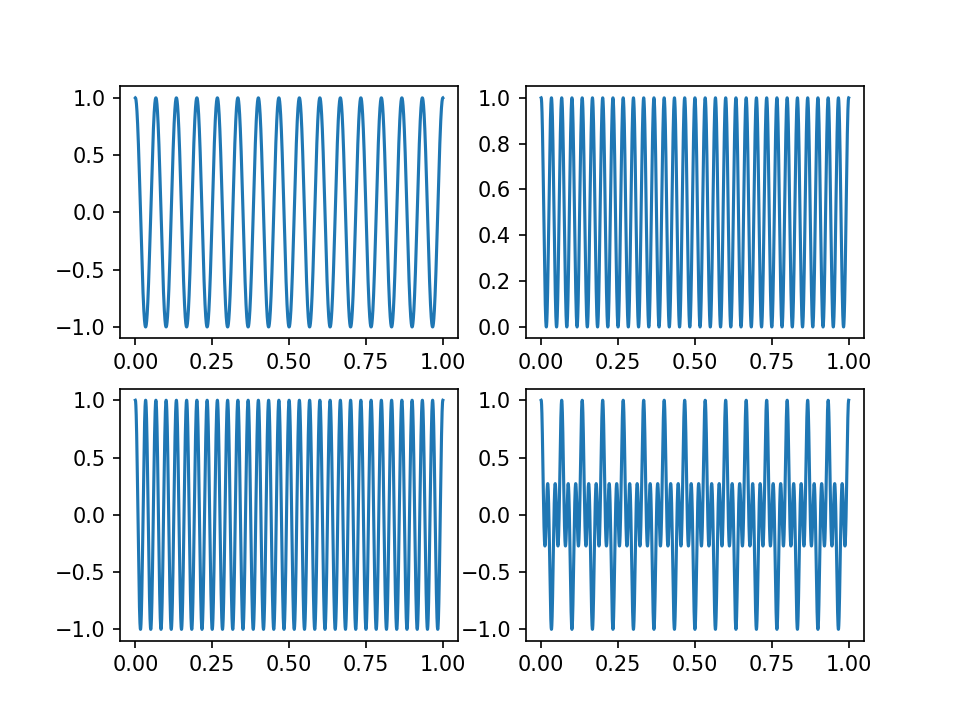

In [286]:


import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


def StudentCosine(t, f, A):
    return A*np.cos(2*np.pi*f*t)

T = np.arange(0, 1, 0.0001)
x1 = StudentCosine(T, 15, 1)
x2 = StudentCosine(T, 30, 1)

plt.figure()
plt.subplot(2,2, 1)
plt.plot(T, x1)

plt.subplot(2,2,2)
plt.plot(T, x1 * x1)

plt.subplot(2,2,3)
plt.plot(T, x2)

plt.subplot(2,2,4)
plt.plot(T, x2 * x1)

In [290]:
# Matrix Operations

A = ([1,0,1], [2, 2, 0], [-3, 4, 1])
A = np.asarray(A)
det_A = np.linalg.det(A)
print('Det A ', det_A)
print()

B = ([1, 1, 0], [2, 0, 1], [0, 0, 3])
B = np.asarray(B)
det_B = np.linalg.det(B)
print('Det B ', det_B)
print()

mat_sum = A + B
print('Sum ', mat_sum)
print()

mat_prod = np.matmul(A, B)
print('Product ', mat_prod)
print()

A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)

print('A inv')
print(A_inv)
print()

print('B inv')
print(B_inv)
print()

A_eig_value, A_eig_vectors = np.linalg.eig(A)
# print this
print(A_eig_value)
print()

print(A_eig_vectors)
print()
print(np.linalg.eigvals(A))
e = np.linalg.eigvals(A)
print()

V = ([e[0], 0, 0], [0, e[1], 0], [0, 0, e[2]])
V = np.asarray(V)


intermediate = np.matmul(A_eig_vectors, V)
final = np.matmul(intermediate, A_inv)
final = np.absolute(final)
print(final)


Det A  16.000000000000007

Det B  -6.0

Sum  [[ 2  1  1]
 [ 4  2  1]
 [-3  4  4]]

Product  [[ 1  1  3]
 [ 6  2  2]
 [ 5 -3  7]]

A inv
[[ 0.125  0.25  -0.125]
 [-0.125  0.25   0.125]
 [ 0.875 -0.25   0.125]]

B inv
[[ 0.          0.5        -0.16666667]
 [ 1.         -0.5         0.16666667]
 [ 0.          0.          0.33333333]]

[0.45631099+2.23028502j 0.45631099-2.23028502j 3.08737803+0.j        ]

[[-0.09073419-0.37220379j -0.09073419+0.37220379j  0.33825267+0.j        ]
 [-0.1875877 +0.21120415j -0.1875877 -0.21120415j  0.62214366+0.j        ]
 [ 0.87945171+0.j          0.87945171-0.j          0.70606119+0.j        ]]

[0.45631099+2.23028502j 0.45631099-2.23028502j 3.08737803+0.j        ]

[[0.91850016 0.13328029 0.16030898]
 [1.68262031 0.75852006 0.25323465]
 [1.96941573 0.34431771 0.56097942]]


In [308]:
# Part E

from sympy import *
# define a new matrix M for part E
M = Matrix([[-1, -2, 2], [4, 3, -4], [0, -2, 1]])

P, D = M.diagonalize()
# P is the matrix of eigenvectors. D is the diagonal matrix of eigenvalues


# check if the decomposition is correct 
correct_decomp = P*D*P ** -1 == M
print(correct_decomp)

True


In [332]:
# Part F

from sympy import *
# define a new symmetric matrix M2 for Part F
M2 = Matrix([[2, 1, 0], [1, 2, 1], [0, 1, 2]])
P2, D2 = M2.diagonalize()
# P is the matrix of eigenvectors. D is the diagonal matrix of eigenvalues


# check if the decomposition is correct 
correct_decomp = P2*D2*P2 ** -1 == M2
print(correct_decomp)

check = M2*M2.T
print(check) 

transpose_check = P2 * D2 * P2.T

transpose_check == correct_decomp

# NOTE: this wasn't working for some reason.. I'm not sure why. The matrix is 
# symmetric but it wasn't giving the expected answer. Perhaps some bug in sympy multiplication? 


False


Matrix([
[5, 4, 1],
[4, 6, 4],
[1, 4, 5]])

## Part 2: Playing with Random Observations

C:\Users\usman\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\usman\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in long_scalars


<IPython.core.display.Javascript object>


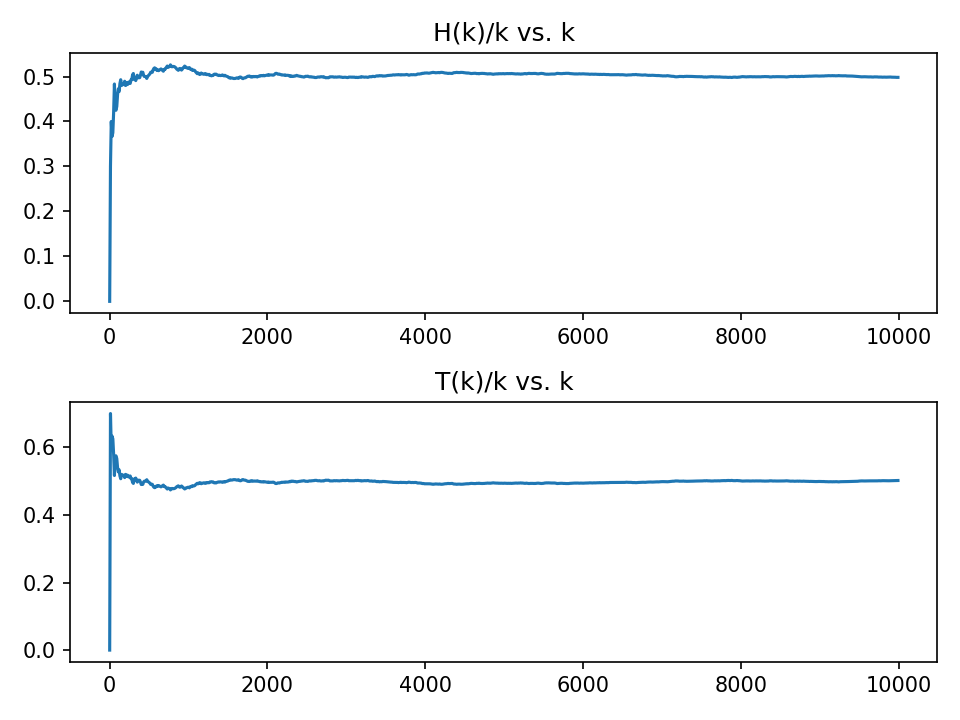

In [109]:
def FairCoinToss():
    choices = [0,1]
    result = np.random.choice(choices,1)
    if (result[0] == 1):
        return "H"
    else:
        return "T"

# 1000 iterations, results stored in list
results = []
for i in range(10000):
    results.append(FairCoinToss())


k = np.arange(0, 10000, 10)
np_results = np.asarray(results)

H_k = []
H_k_norm = []

# Finding probability of Heads
for num in k:
    subsection = np_results[0:num]
#     print(subsection)
    num_occurrences = 0
    for item in subsection:
        if (item == 'H'):
            num_occurrences += 1
    H_k.append(num_occurrences)
    H_k_norm.append(num_occurrences / num)

H_k_norm[0] = 0

T_k = []
T_k_norm = []
# Finding probability of Tails
for num in k:
    subsection = np_results[0:num]
#     print(subsection)
    num_occurrences = 0
    for item in subsection:
        if (item == 'T'):
            num_occurrences += 1
    T_k.append(num_occurrences)
    T_k_norm.append(num_occurrences / num)

T_k_norm[0] = 0

    
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(k, H_k_norm)
plt.title('H(k)/k vs. k')

plt.subplot(2,1,2)
plt.plot(k, T_k_norm)
plt.title('T(k)/k vs. k')
fig.tight_layout()



We can see that H(k)/k converges to 0.5. Hence, the probability of Heads is 0.5. The value that T(k)/k converges to is the probability of Tails, which we can see is also 0.5. 

In [1]:
def BiasedCoinToss(a):
    choices = [0,1]
    probs = [1-a, a]
    result = np.random.choice(choices,1, p = probs)
    if (result[0] == 1):
        return "H"
    else:
        return "T"

results = []
for i in range(10000):
    results.append(BiasedCoinToss(0.2))


k = np.arange(0, 10000, 10)
np_results = np.asarray(results)

H_k = []
H_k_norm = []

# Finding probability of Heads
for num in k:
    subsection = np_results[0:num]
#     print(subsection)
    num_occurrences = 0
    for item in subsection:
        if (item == 'H'):
            num_occurrences += 1
    H_k.append(num_occurrences)
    H_k_norm.append(num_occurrences / num)

H_k_norm[0] = 0

T_k = []
T_k_norm = []
# Finding probability of Tails
for num in k:
    subsection = np_results[0:num]
#     print(subsection)
    num_occurrences = 0
    for item in subsection:
        if (item == 'T'):
            num_occurrences += 1
    T_k.append(num_occurrences)
    T_k_norm.append(num_occurrences / num)

T_k_norm[0] = 0

    
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(k, H_k_norm)
plt.title('H(k)/k vs. k, a = 0.2')

plt.subplot(2,1,2)
plt.plot(k, T_k_norm)
plt.title('T(k)/k vs. k, a = 0.2')
fig.tight_layout()



NameError: name 'np' is not defined

H(k)/k converges to 0.2, so the probability of heads is 0.2. T(k)/k converges to 0.8, so the probability of tails is 0.8.

C:\Users\usman\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\usman\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars


<IPython.core.display.Javascript object>


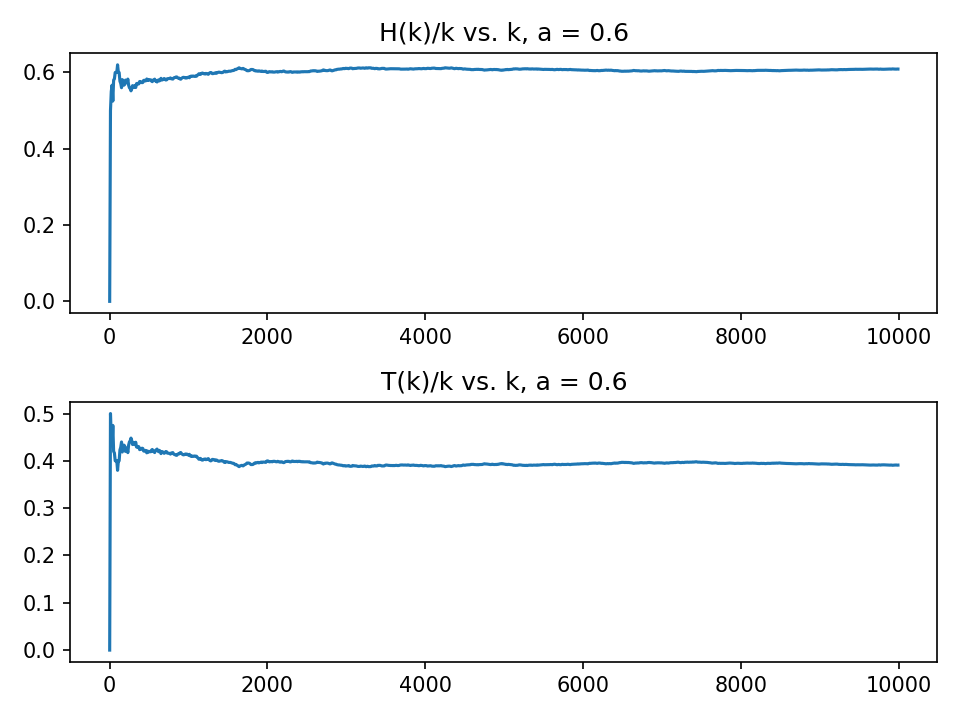

In [114]:
def BiasedCoinToss(a):
    choices = [0,1]
    probs = [1-a, a]
    result = np.random.choice(choices,1, p = probs)
    if (result[0] == 1):
        return "H"
    else:
        return "T"

# 1000 iterations, results stored in a list
results = []
for i in range(10000):
    results.append(BiasedCoinToss(0.6))


k = np.arange(0, 10000, 10)
np_results = np.asarray(results)

H_k = []
H_k_norm = []

# Finding probability of Heads
for num in k:
    subsection = np_results[0:num]
    num_occurrences = 0
    for item in subsection:
        if (item == 'H'):
            num_occurrences += 1
    H_k.append(num_occurrences)
    H_k_norm.append(num_occurrences / num)

H_k_norm[0] = 0

T_k = []
T_k_norm = []
# Finding probability of Tails
for num in k:
    subsection = np_results[0:num]
    num_occurrences = 0
    for item in subsection:
        if (item == 'T'):
            num_occurrences += 1
    T_k.append(num_occurrences)
    T_k_norm.append(num_occurrences / num)

T_k_norm[0] = 0

    
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(k, H_k_norm)
plt.title('H(k)/k vs. k, a = 0.6')

plt.subplot(2,1,2)
plt.plot(k, T_k_norm)
plt.title('T(k)/k vs. k, a = 0.6')
fig.tight_layout()



H(k)/k converges to 0.6, so the probability of heads is 0.6. T(k)/k converges to 0.4, so the probability of tails is 0.4. These results illustrate that the probabilities of each outcome sum to 1. 

C:\Users\usman\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars


<IPython.core.display.Javascript object>


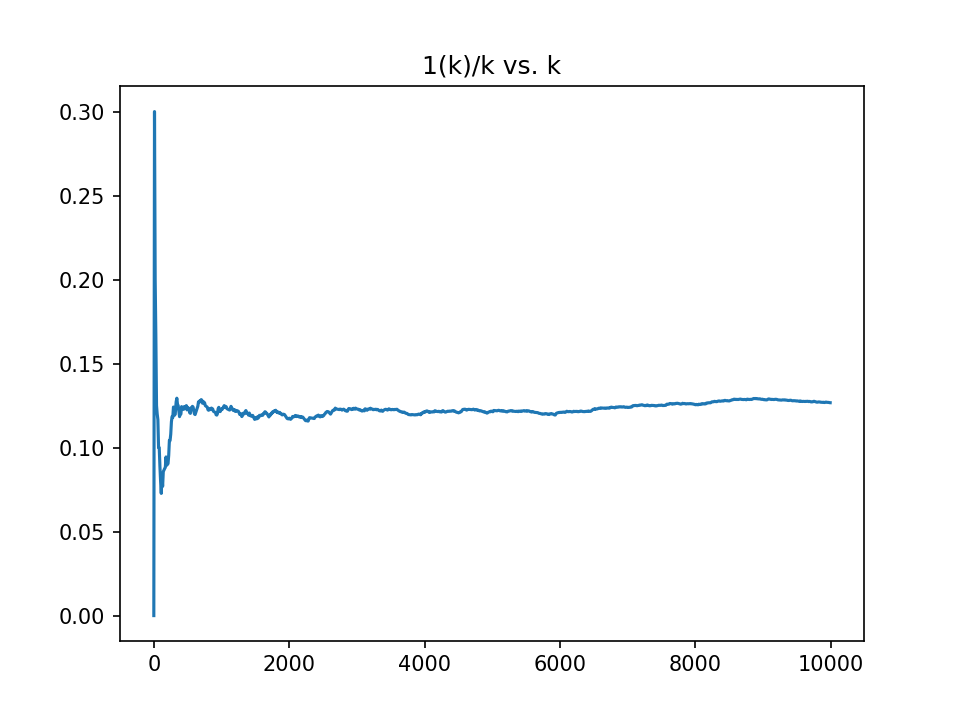

Text(0.5, 1.0, '1(k)/k vs. k')

In [116]:
def EightSidedDieRolling():
    choices = [1,2,3,4,5,6,7,8]
    result = np.random.choice(choices,1)
    return str(result[0])


# 1000 iterations, results stored in a list
results = []
for i in range(10000):
    results.append(EightSidedDieRolling())
    
k = np.arange(0, 10000, 10)
np_results = np.asarray(results)

one_k = []
one_k_norm = []

for num in k:
    subsection = np_results[0:num]
    num_occurrences = 0
    for item in subsection:
        if (item == '1'):
            num_occurrences += 1
    one_k.append(num_occurrences)
    one_k_norm.append(num_occurrences / num)

one_k_norm[0] = 0
plt.figure()
plt.plot(k, one_k_norm)
plt.title('1(k)/k vs. k')


C:\Users\usman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\usman\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


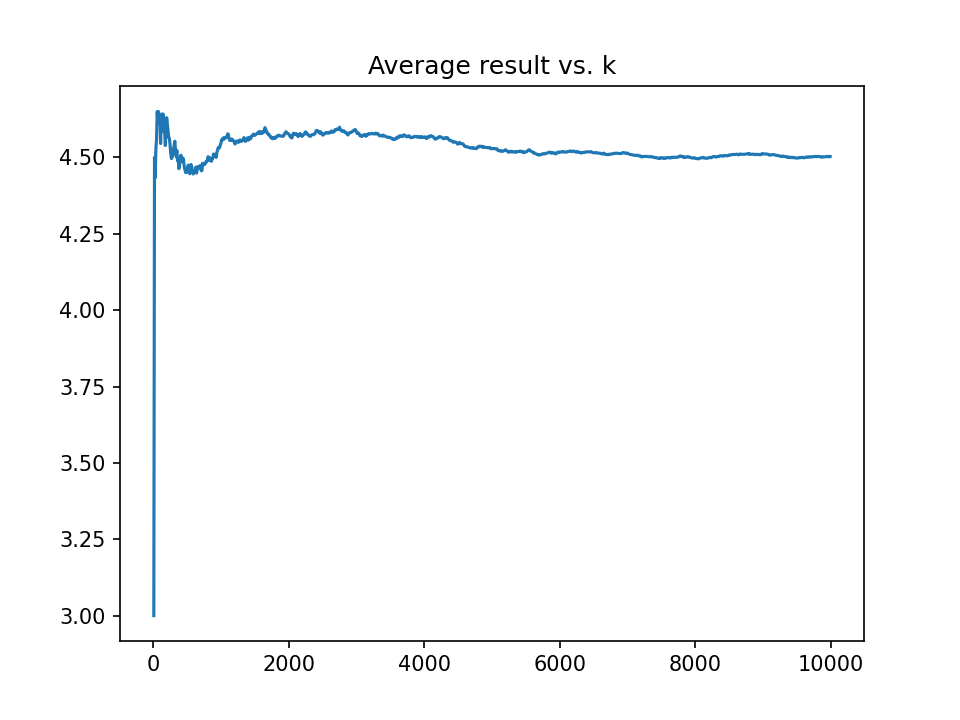

Text(0.5, 1.0, 'Average result vs. k')

In [130]:

# 1000 iterations, results stored in a list
results = []
for i in range(10000):
    results.append(EightSidedDieRolling())
    
k = np.arange(0, 10000, 10)
np_results = np.asarray(results)

avg_k = []

for num in k:
    subsection = np_results[0:num]
    int_sub = []
    for item in subsection:
        int_sub.append(int(item))
    avg_k.append(np.average(int_sub))

plt.figure()
plt.plot(k, avg_k)
plt.title('Average result vs. k')



C) 1(k)/k, or the probability of rolling a 1, converges to 0.125. This makes sense, because 1/8 = 0.125, and all eight sides are equally likely in a fair die. 

D) The average appears to converge to 4.5 

In [117]:
def DieExperiment():
    eight, seven, six, five, four, three, two, one = False,False, False, False, False, False, False, False
    all_rolled = False
    attempts = 0
    while (not all_rolled):
        result = EightSidedDieRolling()
        if (result == '8'):
            eight = True
        elif (result == '7'):
            seven = True
        elif (result == '6'):
            six = True
        elif (result == '5'):
            five = True
        elif (result == '4'):
            four = True
        elif (result == '3'):
            three = True
        elif (result == '2'):
            two = True
        else:
            one = True
        all_rolled = eight and seven and six and five and four and three and two and one
        attempts = attempts + 1
    return attempts

DieExperiment()

exp_results = []
for i in range(1000):
    exp_results.append(DieExperiment())
            
avg_result = np.average(exp_results)
print("Avg result", avg_result)

calculated_sum = 8*(1/1 + 1/2 + 1/3 + 1/4+ 1/5 + 1/6 +1/7 + 1/8)
print("Calculated sum", calculated_sum)

Avg result 21.765
Calculated sum 21.74285714285714


The values match quite closely. 

## Part 3: Real-world Statistics

In [70]:
path_to_data = './covid_19_data.csv'
import pandas as pd

df = pd.read_csv(path_to_data, delimiter = ",")

# unique entities in Country/region that had at least 1 confirmed case
df2 = df[df['Confirmed'] > 0]
num_unique = df2['Country/Region'].nunique()
print(num_unique) # 205





205


A) 205 unique entities

In [197]:

df_china = df[df['Country/Region'] == 'Mainland China']
df_china.tail()

df_china.sort_values(by = 'Deaths', ascending = False)
# B) Hubei had the most deaths 



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
8420,8421,03/24/2020,Hubei,Mainland China,2020-03-24 23:41:50,67801.0,3160.0,60324.0
8123,8124,03/23/2020,Hubei,Mainland China,2020-03-23 23:23:20,67800.0,3153.0,59882.0
7826,7827,03/22/2020,Hubei,Mainland China,3/8/20 5:31,67800.0,3144.0,59433.0
7313,7314,03/21/2020,Hubei,Mainland China,2020-03-21T10:13:08,67800.0,3139.0,58946.0
7014,7015,03/20/2020,Hubei,Mainland China,2020-03-20T07:43:02,67800.0,3133.0,58382.0
...,...,...,...,...,...,...,...,...
785,786,02/05/2020,Liaoning,Mainland China,2020-02-05T15:23:02,89.0,0.0,4.0
783,784,02/05/2020,Yunnan,Mainland China,2020-02-05T23:33:02,128.0,0.0,5.0
781,782,02/05/2020,Guangxi,Mainland China,2020-02-05T12:03:08,150.0,0.0,13.0
780,781,02/05/2020,Shaanxi,Mainland China,2020-02-05T08:43:01,165.0,0.0,6.0


In [231]:
top10 = df.groupby('Country/Region').sum().sort_values(by = 'Confirmed', ascending = False)[0:10]


,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
Mainland China,5381504,3606533.0,122579.0,1858275.0
Italy,170672,571924.0,46856.0,59688.0
Iran,149766,278992.0,16870.0,88991.0
Spain,171139,232288.0,12448.0,18492.0
US,8061334,223838.0,3127.0,1136.0
Germany,171851,198142.0,675.0,5258.0
South Korea,172461,190800.0,1670.0,21645.0
France,774939,144802.0,4825.0,8050.0
Switzerland,138339,58069.0,635.0,504.0


B) Hubei had the most deaths

C) The top 10 countries are: Mainland China, Italy, Iran, Spain, US, Germany, South Korea, France, Switzerland, UK

<IPython.core.display.Javascript object>


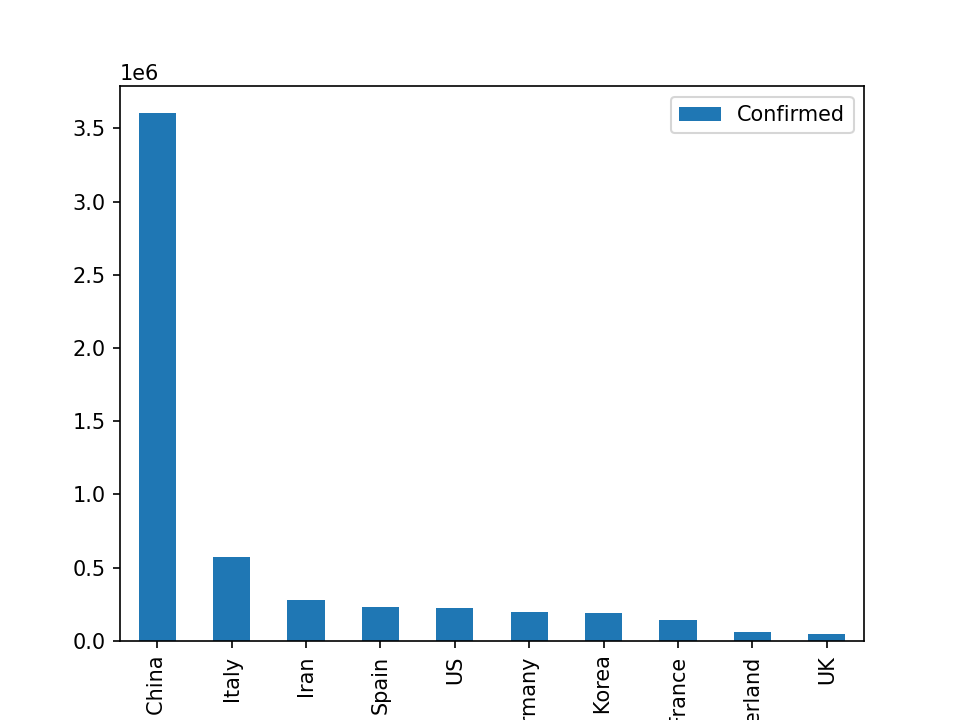

<IPython.core.display.Javascript object>


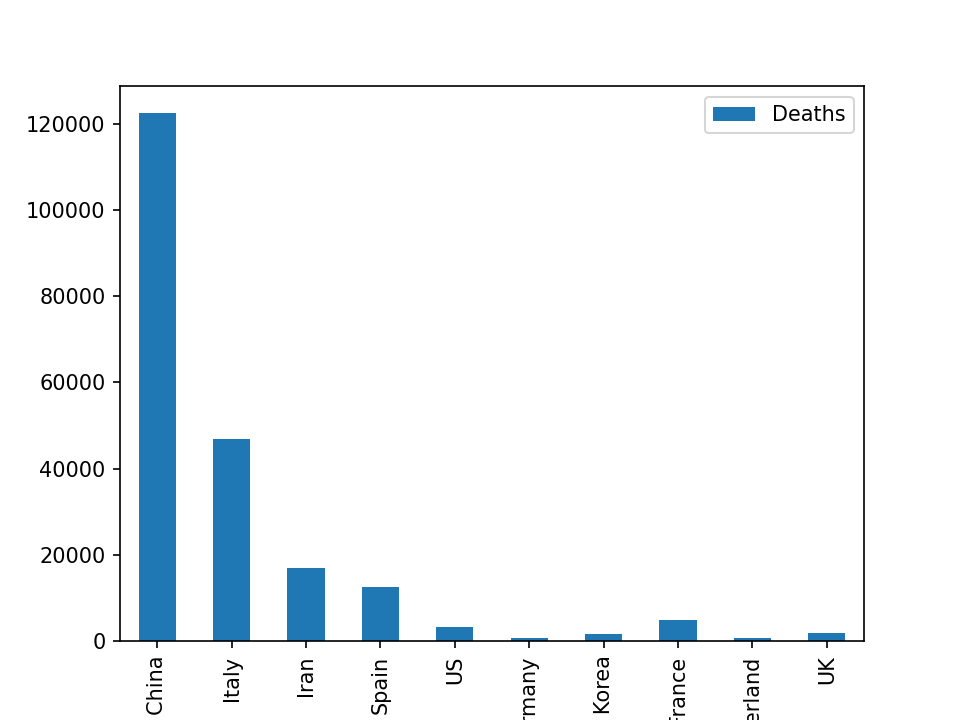

In [284]:
# Make the bar plots
top10.plot.bar(y='Confirmed')
top10.plot.bar(y='Deaths')

In [155]:
top10['Death:Confirmed'] = top10['Deaths'] / top10['Confirmed']
top10.sort_values(by = 'Death:Confirmed', ascending = False)

,SNo,Confirmed,Deaths,Recovered,ratio,Death:Confirmed
Country/Region,,,,,,
Italy,170672,571924.0,46856.0,59688.0,0.081927,0.081927
Iran,149766,278992.0,16870.0,88991.0,0.060468,0.060468
Spain,171139,232288.0,12448.0,18492.0,0.053589,0.053589
UK,559167,44503.0,1859.0,1048.0,0.041772,0.041772
Mainland China,5381504,3606533.0,122579.0,1858275.0,0.033988,0.033988
France,774939,144802.0,4825.0,8050.0,0.033321,0.033321
US,8061334,223838.0,3127.0,1136.0,0.013970,0.013970
Switzerland,138339,58069.0,635.0,504.0,0.010935,0.010935
South Korea,172461,190800.0,1670.0,21645.0,0.008753,0.008753


D) Italy has the highest cumulative Death to Confirmed cases ratio 

In [195]:
wash = df[df['Province/State'] == 'Washington']
latest = wash.loc[wash['ObservationDate'] == '03/24/2020']
day_before = wash.loc[wash['ObservationDate'] == '03/23/2020']
new_cases = latest.iloc[0,5] - day_before.iloc[0,5]
print(new_cases)

107.0


E) New cases in Washington on March 24th 2020: 107


In [230]:
new_cases = []
wash.iloc[20:25]

for i in range(20,25): # start at 20
    new_cases.append(wash.iloc[i, 5] - wash.iloc[i-1, 5])

new_cases = np.asarray(new_cases)
print(new_cases)
print('Mean new cases: ', np.mean(new_cases))
print('Std deviation of new cases: ', np.std(new_cases))


[148. 269. 204. 224. 107.]
Mean new cases:  190.4
Std deviation of new cases:  57.00035087611303


F) Mean new cases: 190.4. Std deviation of new cases: 57. 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7029,7030,03/20/2020,Washington,US,2020-03-20T23:43:03,1524.0,83.0,0.0
7327,7328,03/21/2020,Washington,US,2020-03-21T22:43:04,1793.0,94.0,0.0
7906,7907,03/22/2020,Washington,US,3/8/20 5:31,1997.0,97.0,0.0
8201,8202,03/23/2020,Washington,US,2020-03-23 23:23:20,2221.0,109.0,0.0
8500,8501,03/24/2020,Washington,US,2020-03-24 23:41:50,2328.0,116.0,0.0


1.0